In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
df = pd.read_csv('data.csv')

In [18]:
len(df)

11914

In [19]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [20]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for c in string_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [21]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [24]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Handle missing values (e.g., drop rows with missing values)
df = df.dropna()

Missing values in each column:
make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64


In [25]:
# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'], drop_first=True)

# Display the first few rows of the processed DataFrame
print("\nProcessed DataFrame:")
print(df.head())


Processed DataFrame:
  make       model  year  engine_hp  engine_cylinders  number_of_doors  \
0  bmw  1_series_m  2011      335.0               6.0              2.0   
1  bmw    1_series  2011      300.0               6.0              2.0   
2  bmw    1_series  2011      300.0               6.0              2.0   
3  bmw    1_series  2011      230.0               6.0              2.0   
4  bmw    1_series  2011      230.0               6.0              2.0   

   highway_mpg  city_mpg  popularity   msrp  ...  vehicle_style_convertible  \
0           26        19        3916  46135  ...                      False   
1           28        19        3916  40650  ...                       True   
2           28        20        3916  36350  ...                      False   
3           28        18        3916  29450  ...                      False   
4           28        18        3916  34500  ...                       True   

   vehicle_style_convertible_suv  vehicle_style_coupe  \
0

In [31]:
# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df[['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity', 'msrp']].describe())


Summary statistics for numerical columns:
         engine_hp  engine_cylinders  highway_mpg     city_mpg   popularity  \
count  8084.000000       8084.000000  8084.000000  8084.000000  8084.000000   
mean    274.642751          5.778080    26.650915    19.553686  1499.397823   
std     115.003475          1.886088     7.720473     7.159964  1413.855615   
min      55.000000          0.000000    12.000000     7.000000     2.000000   
25%     192.000000          4.000000    22.000000    16.000000   549.000000   
50%     264.000000          6.000000    26.000000    18.000000  1013.000000   
75%     320.000000          6.000000    30.000000    22.000000  2009.000000   
max    1001.000000         16.000000   354.000000   137.000000  5657.000000   

               msrp  
count  8.084000e+03  
mean   5.007267e+04  
std    7.029313e+04  
min    2.000000e+03  
25%    2.591875e+04  
50%    3.500500e+04  
75%    4.872250e+04  
max    2.065902e+06  


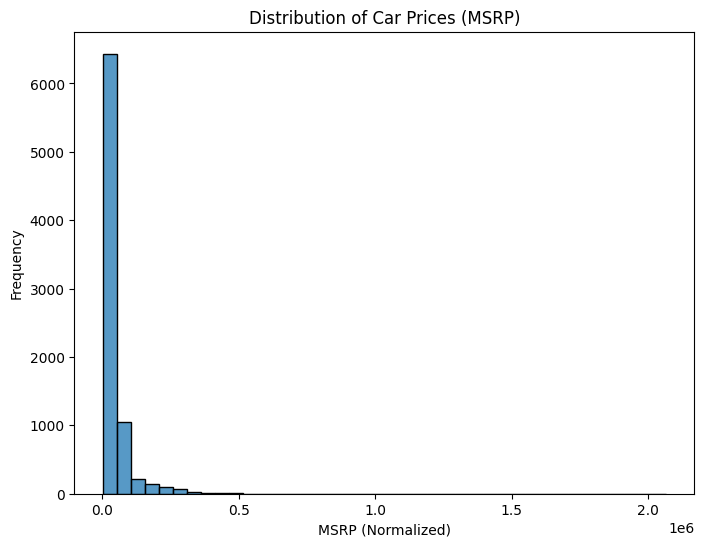

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of car prices (MSRP)
plt.figure(figsize=(8, 6))
sns.histplot(df['msrp'], bins=40)
plt.title('Distribution of Car Prices (MSRP)')
plt.xlabel('MSRP (Normalized)')
plt.ylabel('Frequency')
plt.show()

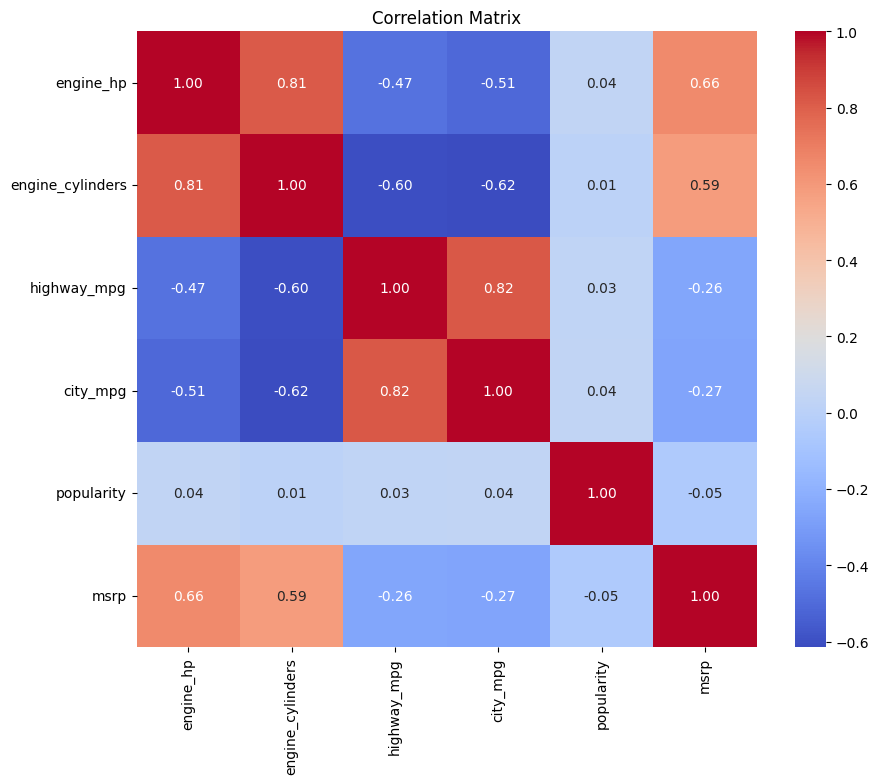

In [73]:
# Correlation matrix for numerical columns
corr_matrix = df[['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity', 'msrp']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

C:\Users\Rashmina\AppData\Local\Temp\ipykernel_6124\3147276886.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_prices.index, y=avg_prices.values, palette='viridis')


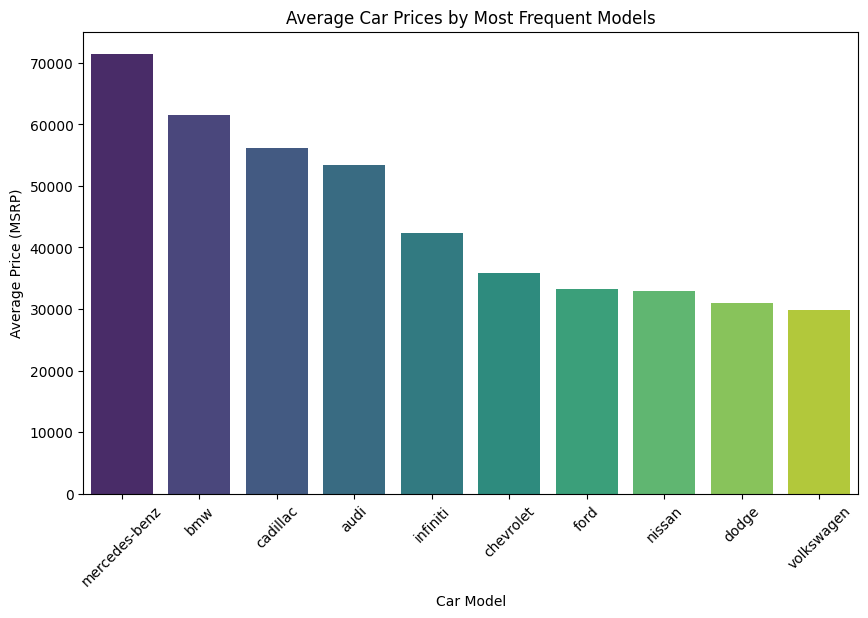

In [43]:
# Step 1: Identify the most frequent car models
top_models = df['make'].value_counts().nlargest(10).index  # Adjust the number (e.g., top 10)

# Step 2: Calculate the average price for each of the top models
avg_prices = df[df['make'].isin(top_models)].groupby('make')['msrp'].mean().sort_values(ascending=False)

# Step 3: Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_prices.index, y=avg_prices.values, palette='viridis')
plt.title('Average Car Prices by Most Frequent Models')
plt.xlabel('Car Model')
plt.ylabel('Average Price (MSRP)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

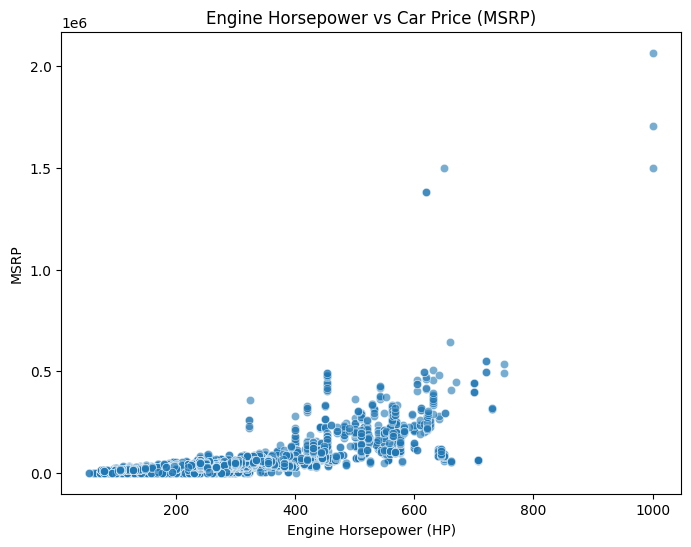

In [47]:
# Scatterplot: Engine Horsepower vs MSRP
plt.figure(figsize=(8, 6))
sns.scatterplot(x='engine_hp', y='msrp', data=df, alpha=0.6)
plt.title('Engine Horsepower vs Car Price (MSRP)')
plt.xlabel('Engine Horsepower (HP)')
plt.ylabel('MSRP')
plt.show()


In [53]:
for column in df.columns:
    print(column)

make
model
year
engine_hp
engine_cylinders
number_of_doors
highway_mpg
city_mpg
popularity
msrp
engine_fuel_type_electric
engine_fuel_type_flex-fuel_(premium_unleaded_recommended/e85)
engine_fuel_type_flex-fuel_(premium_unleaded_required/e85)
engine_fuel_type_flex-fuel_(unleaded/e85)
engine_fuel_type_premium_unleaded_(recommended)
engine_fuel_type_premium_unleaded_(required)
engine_fuel_type_regular_unleaded
transmission_type_automatic
transmission_type_direct_drive
transmission_type_manual
transmission_type_unknown
driven_wheels_four_wheel_drive
driven_wheels_front_wheel_drive
driven_wheels_rear_wheel_drive
market_category_crossover,diesel
market_category_crossover,exotic,luxury,high-performance
market_category_crossover,exotic,luxury,performance
market_category_crossover,factory_tuner,luxury,high-performance
market_category_crossover,factory_tuner,luxury,performance
market_category_crossover,factory_tuner,performance
market_category_crossover,flex_fuel
market_category_crossover,flex_

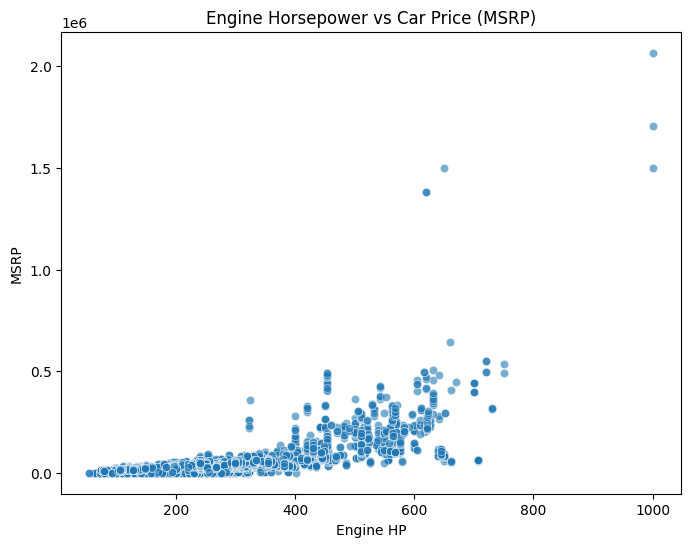

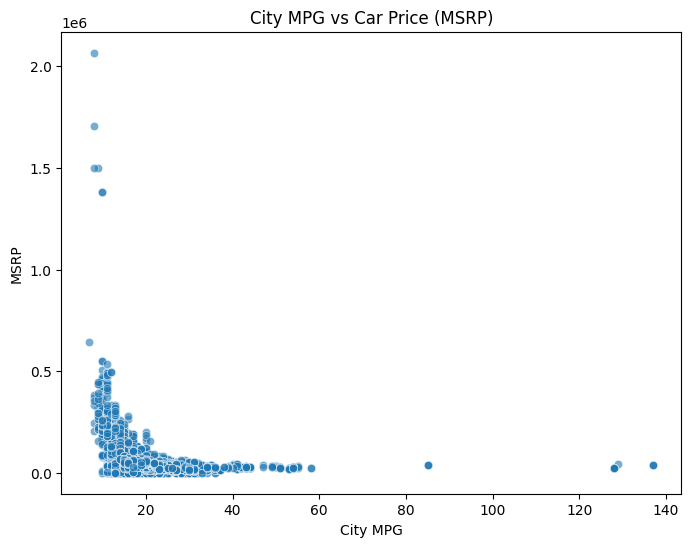

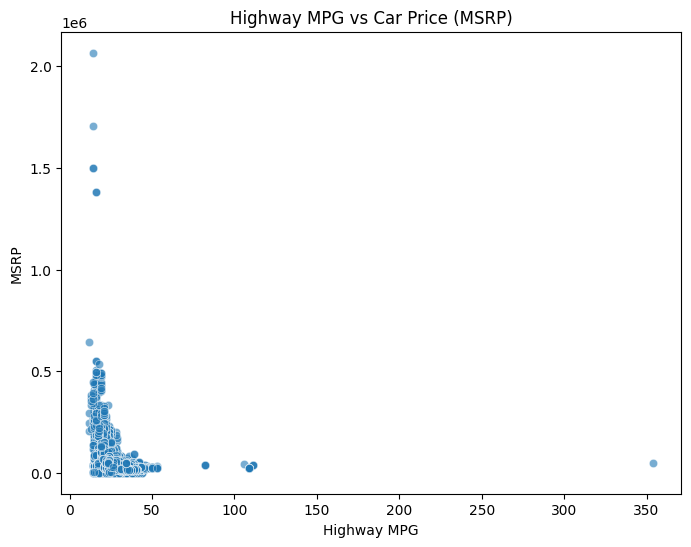

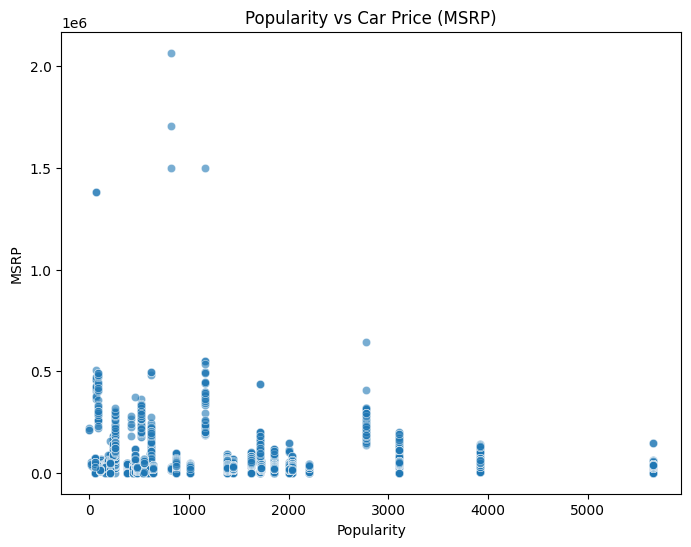

In [56]:
# Scatterplot: Engine HP vs MSRP
plt.figure(figsize=(8, 6))
sns.scatterplot(x='engine_hp', y='msrp', data=df, alpha=0.6)
plt.title('Engine Horsepower vs Car Price (MSRP)')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.show()

# Scatterplot: City MPG vs MSRP
plt.figure(figsize=(8, 6))
sns.scatterplot(x='city_mpg', y='msrp', data=df, alpha=0.6)
plt.title('City MPG vs Car Price (MSRP)')
plt.xlabel('City MPG')
plt.ylabel('MSRP')
plt.show()

# Scatterplot: Highway MPG vs MSRP
plt.figure(figsize=(8, 6))
sns.scatterplot(x='highway_mpg', y='msrp', data=df, alpha=0.6)
plt.title('Highway MPG vs Car Price (MSRP)')
plt.xlabel('Highway MPG')
plt.ylabel('MSRP')
plt.show()

# Scatterplot: Popularity vs MSRP
plt.figure(figsize=(8, 6))
sns.scatterplot(x='popularity', y='msrp', data=df, alpha=0.6)
plt.title('Popularity vs Car Price (MSRP)')
plt.xlabel('Popularity')
plt.ylabel('MSRP')
plt.show()

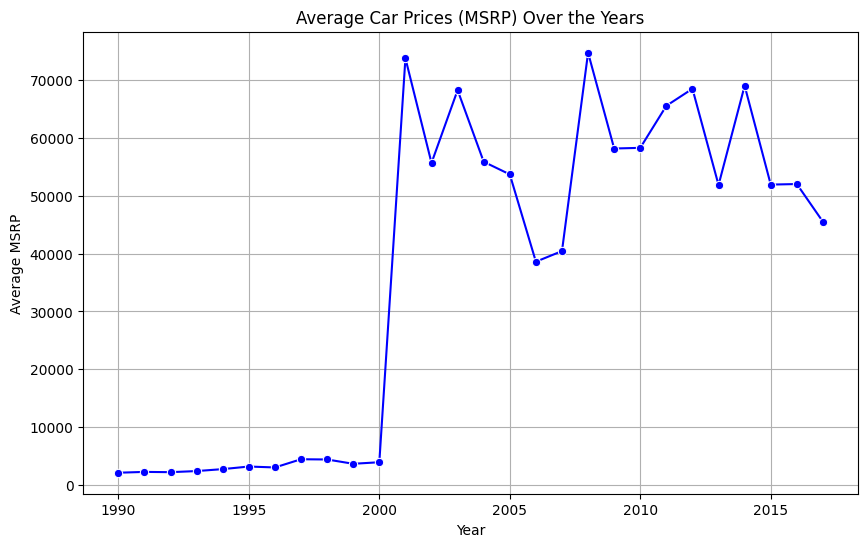

In [62]:
# Group by year and calculate the average MSRP
avg_prices_by_year = df.groupby('year')['msrp'].mean().reset_index()

# Plot the line graph
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='msrp', data=avg_prices_by_year, marker='o', color='b')
plt.title('Average Car Prices (MSRP) Over the Years')
plt.xlabel('Year')
plt.ylabel('Average MSRP')
plt.grid(True)  # Add grid for better readability
plt.show()

In [63]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Prepare the data
# Select relevant features for regression (you can adjust this based on your dataset)
features = ['engine_hp', 'engine_cylinders', 'city_mpg', 'highway_mpg', 'popularity']
X = df[features]  # Independent variables
y = df['msrp']    # Dependent variable (target)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
# Calculate Mean Squared Error (MSE) and R-squared (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

# Step 6: Interpret the coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
print("\nRegression Coefficients:")
print(coefficients)

Mean Squared Error (MSE): 2153104435.7842855
R-squared (R²): 0.523756071837594

Regression Coefficients:
            Feature  Coefficient
0         engine_hp   330.058349
1  engine_cylinders  9827.445162
2          city_mpg  1388.000547
3       highway_mpg   410.273278
4        popularity    -3.897411


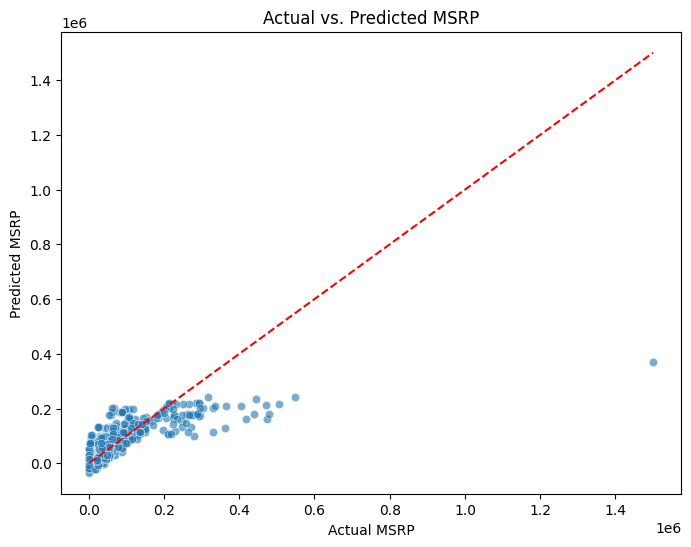

In [64]:
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line for reference
plt.title('Actual vs. Predicted MSRP')
plt.xlabel('Actual MSRP')
plt.ylabel('Predicted MSRP')
plt.show()

<Figure size 1200x800 with 0 Axes>

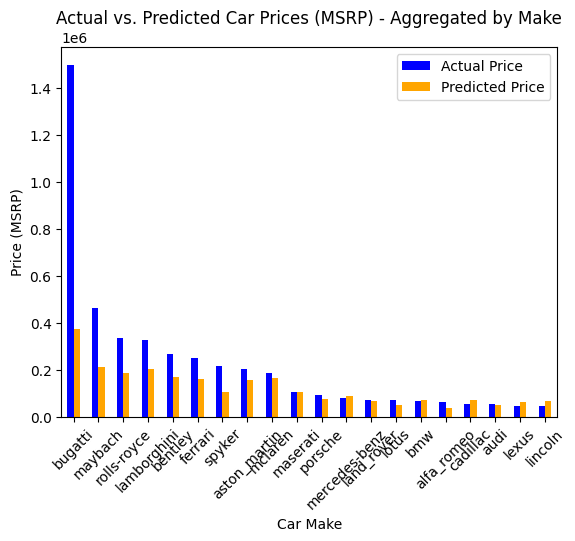

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregate actual and predicted prices by car make (using mean)
results_grouped = results.groupby(df.loc[results.index, 'make']).mean()

# Select a subset for better visualization (e.g., top 20 based on actual price)
results_subset = results_grouped.nlargest(20, 'Actual Price').copy()

# Plot the bar chart
plt.figure(figsize=(12, 8))
results_subset.plot(kind='bar', color=['blue', 'orange'])
plt.title('Actual vs. Predicted Car Prices (MSRP) - Aggregated by Make')
plt.xlabel('Car Make')  # Updated x-axis label
plt.ylabel('Price (MSRP)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [67]:
from sklearn.tree import DecisionTreeRegressor

# Train a Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f'Decision Tree - Mean Squared Error (MSE): {mse_tree}')
print(f'Decision Tree - R-squared (R²): {r2_tree}')

Decision Tree - Mean Squared Error (MSE): 326881601.59069055
Decision Tree - R-squared (R²): 0.9276972471013172


<Figure size 1200x800 with 0 Axes>

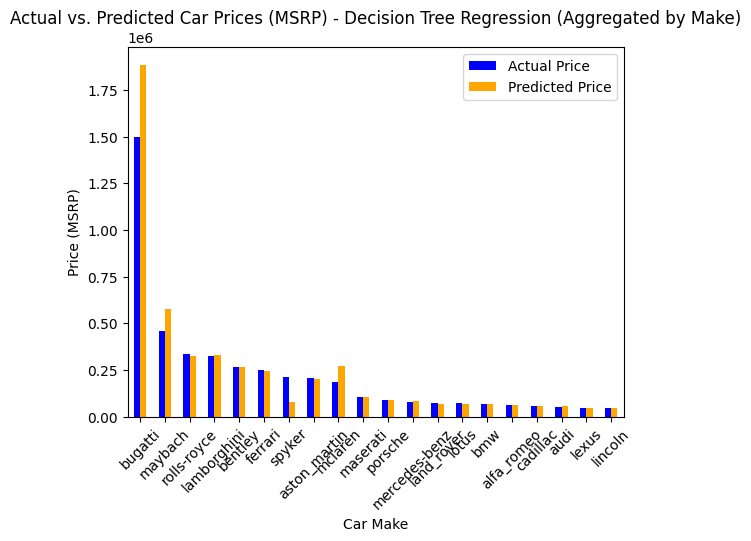

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregate by car make and compute the mean (or use median if preferred)
results_tree_grouped = results_tree.groupby('Model', as_index=False).mean()

# Select a subset for better visualization (e.g., top 20 based on actual price)
results_subset_tree = results_tree_grouped.nlargest(20, 'Actual Price')

# Plot the bar chart
plt.figure(figsize=(12, 8))
results_subset_tree.plot(kind='bar', x='Model', y=['Actual Price', 'Predicted Price'], color=['blue', 'orange'])
plt.title('Actual vs. Predicted Car Prices (MSRP) - Decision Tree Regression (Aggregated by Make)')
plt.xlabel('Car Make')
plt.ylabel('Price (MSRP)')
plt.xticks(rotation=45)
plt.legend()
plt.show()
